<a href="https://colab.research.google.com/github/Akilu-phat/SCM_8/blob/main/SCM_grp_8_final_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))



In [ ]:
!pip install mpl-finance

In [ ]:
!pip install arch

     |████████████████████████████████| 798kB 2.6MB/s 


In [ ]:
!pip install  yfinance

     |████████████████████████████████| 5.5MB 3.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=acea7f014fe4e3dbf56877e5e166d140f3048b1c68ea1c0b3f0c2011a0df4840
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install quandl

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web

import yfinance as yf

In [ ]:
mtn = yf.download('MTN',
                  start = '2006-06-30',
                  end='2020-10-3',
                  progress = False)

Jifeng = yf.download('600616.SS',
                  start = '2006-06-30',
                  end='2020-10-3',
                  progress = False)

In [ ]:
#viewing mtn dataframe
mtn.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-06-30,36.200001,37.099998,36.049999,37.099998,30.398458,755900
2006-07-03,37.049999,37.150002,36.770000,37.000000,30.316528,164200
2006-07-05,36.930000,36.970001,36.119999,36.259998,29.710184,185600
2006-07-06,36.290001,36.410000,36.200001,36.349998,29.783924,155000
2006-07-07,36.220001,36.220001,35.369999,35.450001,29.046509,356800


In [ ]:
#viewing jifeng dataframe
Jifeng.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-06-30,10.17950,10.17950,9.81410,10.07690,8.897742,4536194
2006-07-03,9.92949,10.00000,9.67949,9.85256,8.699651,6530715
2006-07-04,9.83974,9.96154,9.61538,9.65385,8.524195,8103962
2006-07-05,9.61538,9.64744,9.01923,9.23077,8.150622,9460688
2006-07-06,9.22436,9.40385,9.11538,9.32051,8.229862,9436396


In [ ]:
#mtn data frame descriptive statistics
mtn.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3.590000e+03
mean,104.984415,106.249981,103.698841,104.994861,95.669072,3.363535e+05
std,76.955390,77.721595,76.164999,76.929716,75.703295,2.391296e+05
min,15.250000,16.080000,14.760000,14.800000,12.126607,3.540000e+04
25%,44.200001,44.902501,43.502500,44.279999,36.404659,1.922500e+05
50%,66.494999,67.240002,65.974998,66.445000,56.861877,2.771500e+05
75%,165.965000,169.777496,163.532501,166.862495,159.112286,4.042500e+05
max,298.950012,302.760010,296.809998,301.420013,284.857513,3.219400e+06


In [ ]:
# JIfeng dataframe descriptive statistics
Jifeng.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3473.000000,3473.000000,3473.000000,3473.000000,3473.000000,3.473000e+03
mean,8.535370,8.711044,8.372236,8.546128,7.959184,9.266162e+06
std,3.556526,3.651931,3.459879,3.556710,3.075555,8.231778e+06
min,3.130770,3.292310,3.130770,3.238460,3.219353,0.000000e+00
25%,6.400000,6.500000,6.300000,6.392310,6.079314,3.914303e+06
50%,8.044870,8.169230,7.907690,8.061540,7.572840,6.705148e+06
75%,9.846150,10.038500,9.679490,9.853850,9.140792,1.192121e+07
max,23.352600,23.352600,21.955099,22.423100,19.959593,7.675498e+07


Populating the interactive namespace from numpy and matplotlib


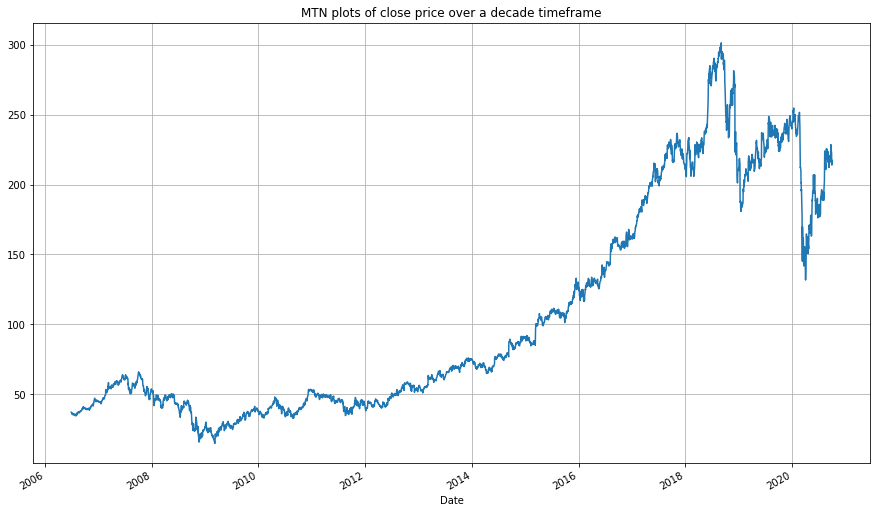

In [ ]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
mtn['Close'].plot(title='MTN plots of close price over a decade timeframe', grid = True) # Plot the adjusted closing price of AAPL


Populating the interactive namespace from numpy and matplotlib


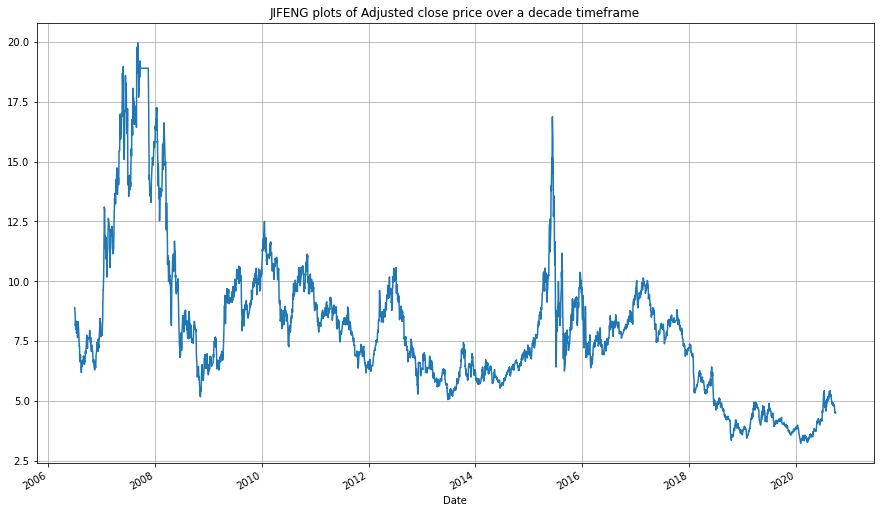

In [ ]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
Jifeng['Adj Close'].plot(title='JIFENG plots of Adjusted close price over a decade timeframe',grid = True) # Plot the adjusted closing price of JIFENG


Even though the plots above give a fair idea of the dynamics of price action we are limited as not all the features of our dataset is included in the plot above, we thusly hope for a graph that incorporate the Open, High, Low and Close features of our datasets and no plots does this better than the candlestick plot. Below is the candlestick plot of MTN and JIFENG over the past decade
# Candle stick plot of our stock price over the past decade

---



CandleStIck Plot of MTN over the past decade


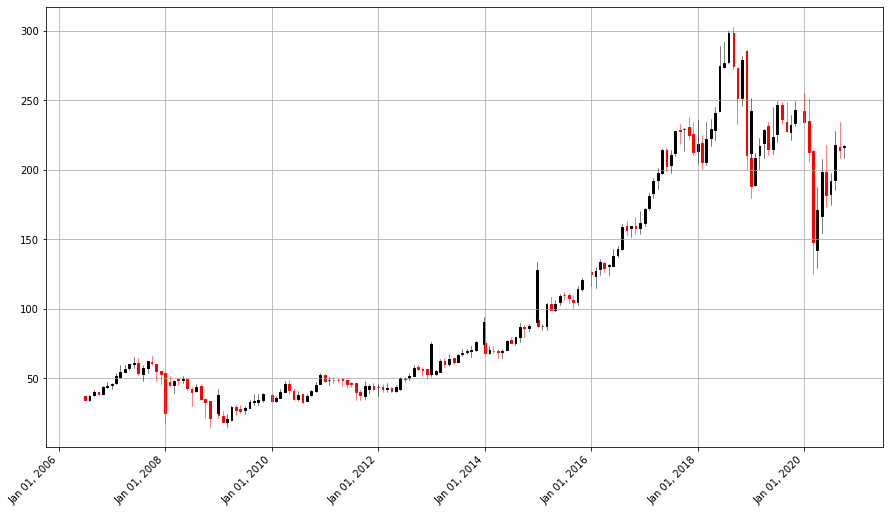

In [ ]:
print('CandleStIck Plot of MTN over the past decade')

from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", adj = False, otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param adj: A boolean indicating whether to use adjusted prices
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    fields = ["Open", "High", "Low", "Close"]
    
    transdat = dat.loc[:,fields]
    transdat.columns = pd.Index(["Open", "High", "Low", "Close"])
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(mtn, adj=True, stick="month",)


CandleStIck Plot of MTN over the past decade


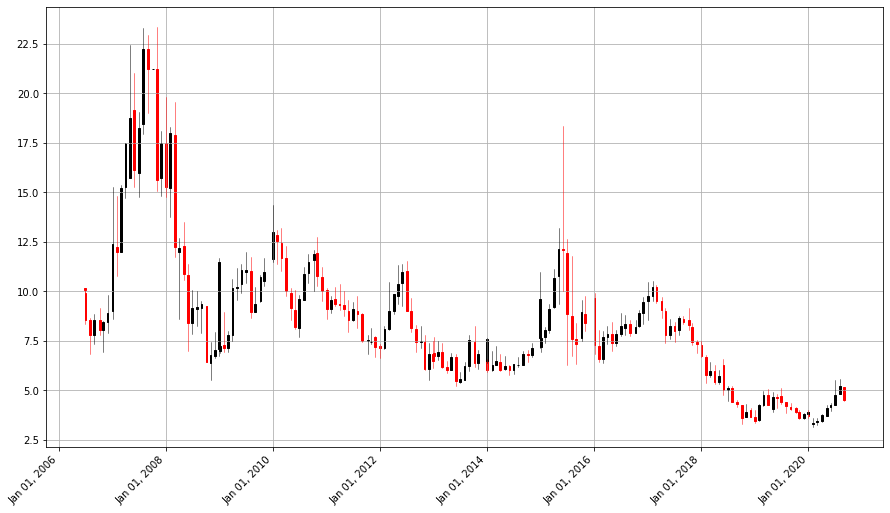

In [ ]:
print('CandleStIck Plot of MTN over the past decade')
pandas_candlestick_ohlc(Jifeng, adj=True, stick="month",)

# Stationarity and Normality in financial Data

What stationary means is that the statistics of the underlying signals are stable over time, leaving aside comprehensive mathematical description. 
Stationary, though, is a major problem in the field of finance. For example , consider the price signal in the figure below for MTN and JIFENG. A robust statistical test is not required to ensure that the average price does not stay constant over time.

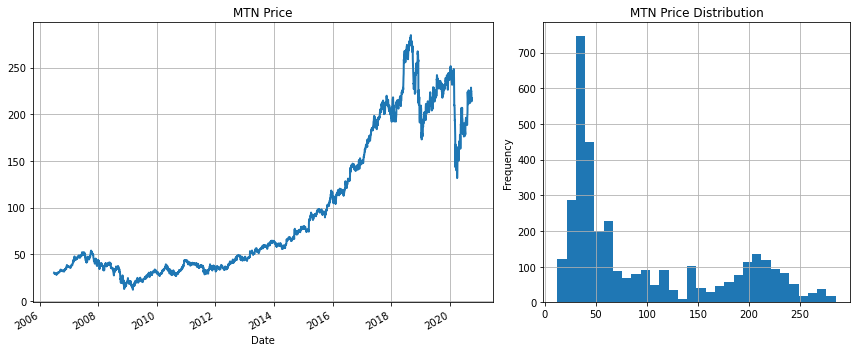

In [ ]:
subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1], )
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
mtn["Adj Close"].plot(title='MTN Price', ax=ax[0], grid=True, linewidth=2)
mtn["Adj Close"].plot.hist(title='MTN Price Distribution', ax=ax[1], grid=True, bins=30)
plt.tight_layout()
plt.savefig('tmp.png')

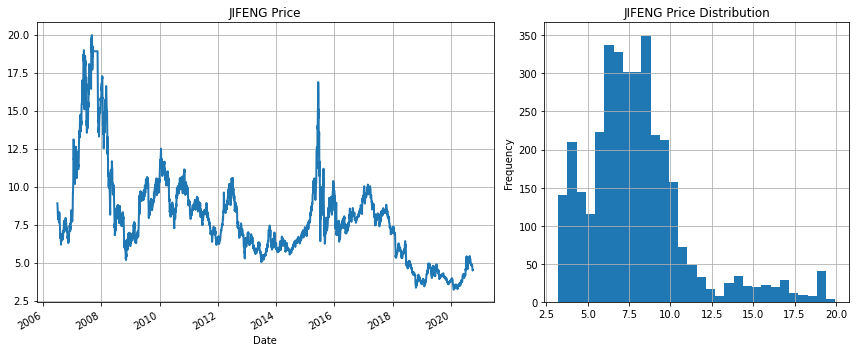

In [ ]:
subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1])
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
Jifeng["Adj Close"].plot(title='JIFENG Price', ax=ax[0], grid=True, linewidth=2)
Jifeng["Adj Close"].plot.hist(title='JIFENG Price Distribution', ax=ax[1], grid=True, bins=30)
plt.tight_layout()
plt.savefig('tmp.png')

# testing for null values or missing points

In [ ]:
Jifeng['Close'].isna().sum()

0

In [ ]:
mtn['Close'].isna().sum()

0

Populating the interactive namespace from numpy and matplotlib


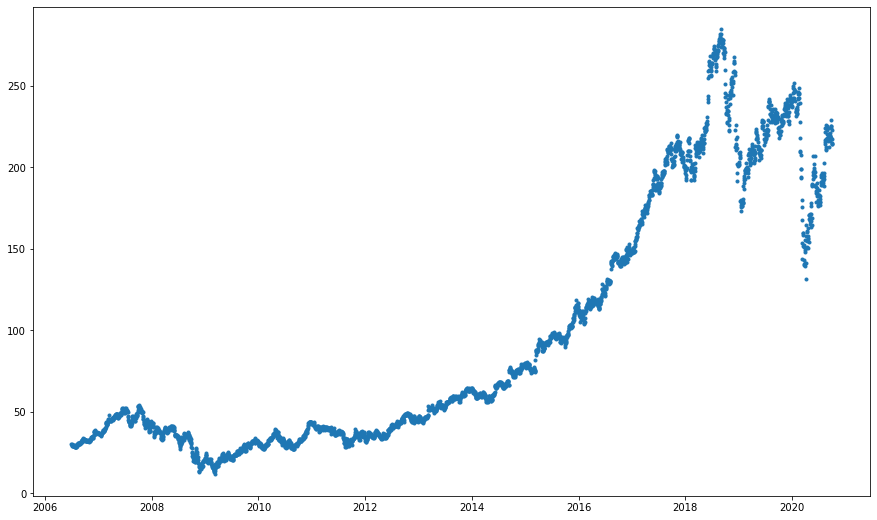

In [ ]:
# setting the date column as indx
mtn['Date'] = mtn.index
Jifeng['Date'] = Jifeng.index 

import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
x = mtn['Date']
y = mtn['Adj Close']
plt.scatter(x, y, marker='.');

 
#mtn['Close'].plot.scatter(title='MTN plots of close price over a decade timeframe', grid = True) # Plot the adjusted closing price of AAPL

# LOG RETURNs
Log returns are a statistical method that seeks to differentiates between log valuesat time t-1 and t, which is why it is often referred to as log-Differencing.

$$r_t = ln\frac{p(t)}{P(t-1)} = ln(p(t)) - ln(p(t-1))$$

The aim of bthis process is to generate stationary signals suitable for Machine learning and othe classical statistics. Evidence of stationarity of the log returns is seen from the return plots OF MTN and JIFENG bvelow, one could see thatr our Returns plot has a conmtant mean around zero and a more constant zero

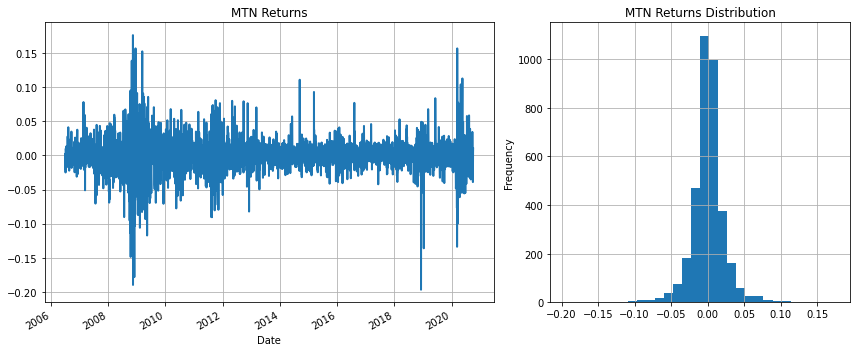

In [ ]:
rs_mtn = mtn["Adj Close"].apply(np.log).diff(1)

subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1])
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
rs_mtn.plot(title='MTN Returns', ax=ax[0], grid=True, linewidth=2)
rs_mtn.plot.hist(title='MTN Returns Distribution', ax=ax[1], grid=True, bins=30)
plt.tight_layout()
plt.savefig('tmp.png')

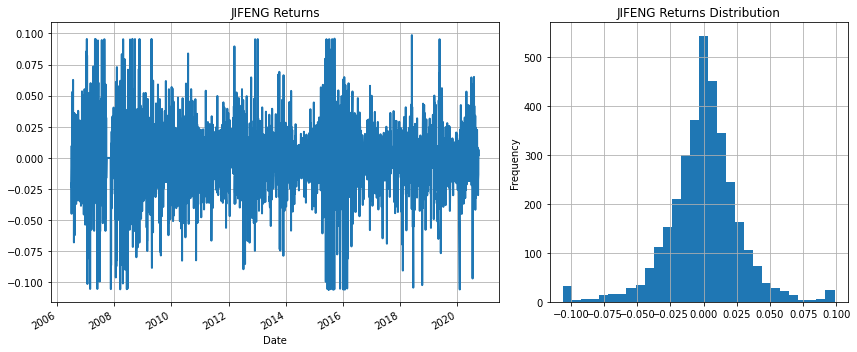

In [ ]:
rs_Jfng = Jifeng["Adj Close"].apply(np.log).diff(1)

subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1])
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
rs_Jfng.plot(title='JIFENG Returns', ax=ax[0], grid=True, linewidth=2)
rs_Jfng.plot.hist(title='JIFENG Returns Distribution', ax=ax[1], grid=True, bins=30)
plt.tight_layout()
plt.savefig('tmp.png')

# __ROLLING STATISTICS FOR OUR RETURNS__
We have shown that log returns, with some indications of stationarity, obey classic normal distributions. By looking at the rolling statistics of our returns over a short-term window,we wish tro have a deeper dive into the market insights.from the both plots below we can clearly see the staionarity  displayed by the moving average, volatility, skew and kurtosis. this confirms our level of confidence in the stationarity of both returns


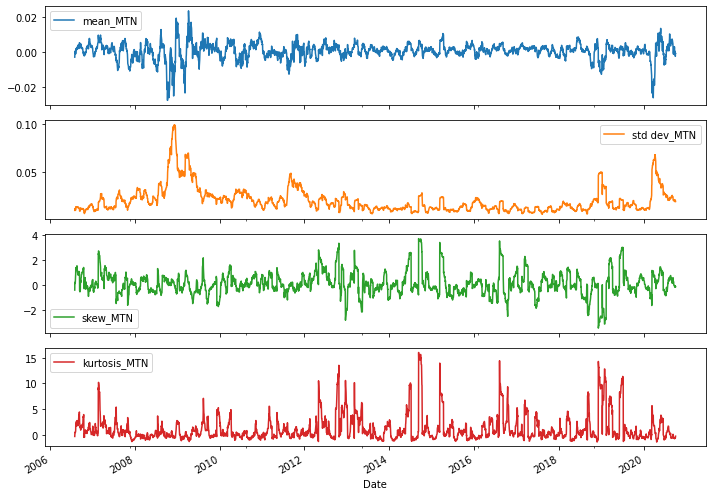

In [ ]:
w = 22
s1 = rs_mtn.rolling(w).mean()
s2 = rs_mtn.rolling(w).std()
s3 = rs_mtn.rolling(w).skew()
s4 = rs_mtn.rolling(w).kurt()

signals = pd.concat([s1, s2, s3, s4], axis=1)
signals.columns = ['mean_MTN', 'std dev_MTN', 'skew_MTN', 'kurtosis_MTN']
signals.plot(subplots=True, figsize=(10,7));
plt.tight_layout()
plt.savefig('tmp.png')

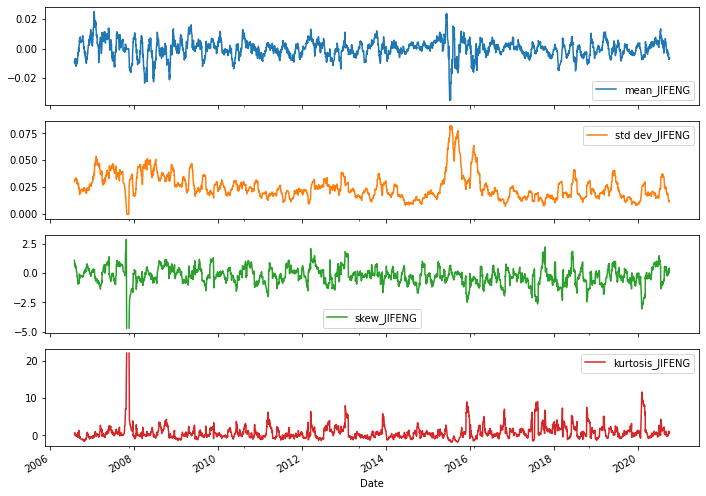

In [ ]:
w = 22
s1 = rs_Jfng.rolling(w).mean()
s2 = rs_Jfng.rolling(w).std()
s3 = rs_Jfng.rolling(w).skew()
s4 = rs_Jfng.rolling(w).kurt()

signals = pd.concat([s1, s2, s3, s4], axis=1)
signals.columns = ['mean_JIFENG', 'std dev_JIFENG', 'skew_JIFENG', 'kurtosis_JIFENG']
signals.plot(subplots=True, figsize=(10,7));
plt.tight_layout()
plt.savefig('tmp.png')

#  plot of volumes of dialy traded stock over the past decades

Populating the interactive namespace from numpy and matplotlib


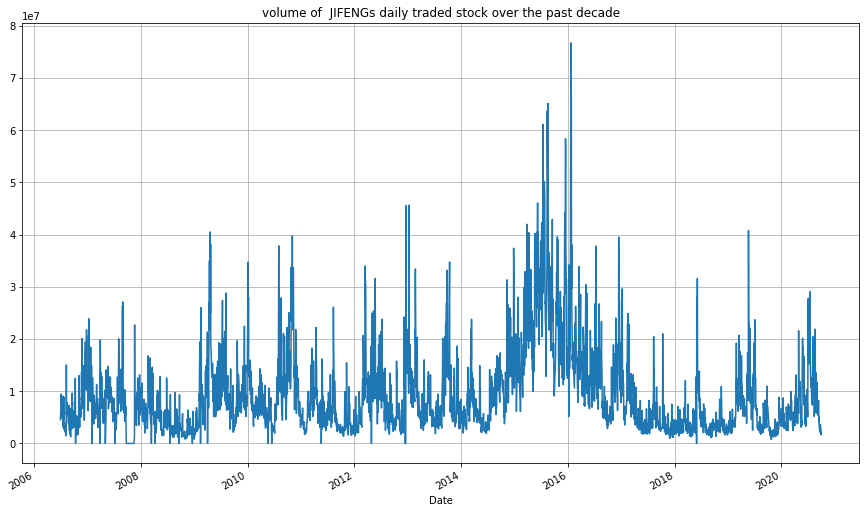

In [ ]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
Jifeng['Volume'].plot(title='volume of  JIFENGs daily traded stock over the past decade',grid = True) # Plot the volume of jfng

Populating the interactive namespace from numpy and matplotlib


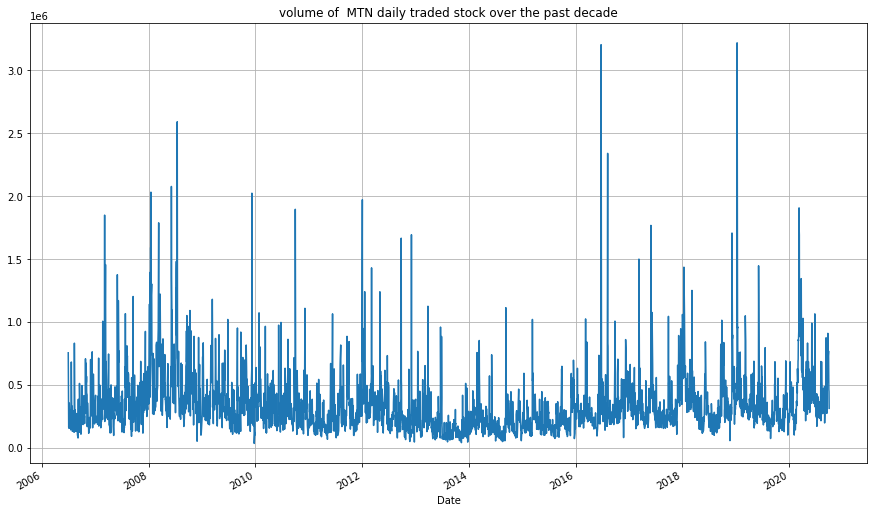

In [ ]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
mtn['Volume'].plot(title='volume of  MTN daily traded stock over the past decade',grid = True) # Plot the volume of MTN

# Correlation of our data features


In [ ]:
corr_mtn = mtn.corr(method='pearson', )
corr_mtn

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999788,0.999756,0.999593,0.998499,0.024013
High,0.999788,1.000000,0.999628,0.999771,0.998916,0.030613
Low,0.999756,0.999628,1.000000,0.999809,0.998442,0.017486
Close,0.999593,0.999771,0.999809,1.000000,0.998891,0.023650
Adj Close,0.998499,0.998916,0.998442,0.998891,1.000000,0.031036
Volume,0.024013,0.030613,0.017486,0.023650,0.031036,1.000000


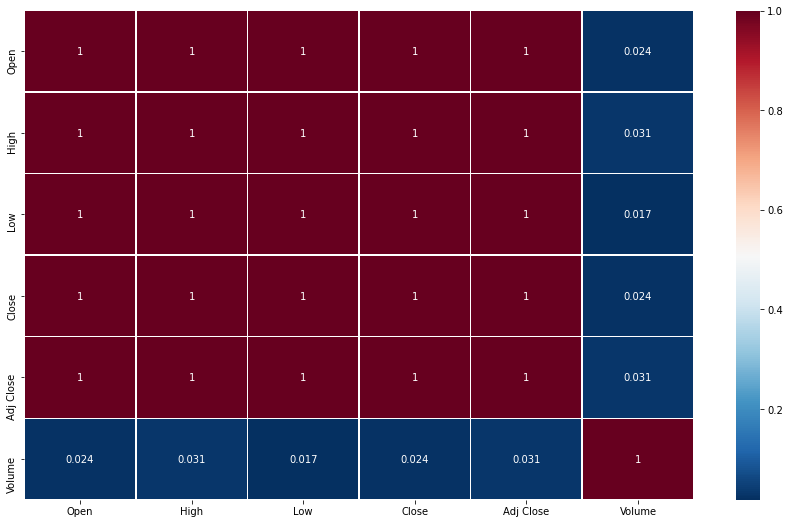

In [ ]:
import seaborn as sb
sb.heatmap(corr_mtn,xticklabels=corr_mtn.columns, yticklabels=corr_mtn.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

In [ ]:
corr_Jfng = mtn.corr(method='pearson', )
corr_Jfng

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999788,0.999756,0.999593,0.998499,0.024013
High,0.999788,1.000000,0.999628,0.999771,0.998916,0.030613
Low,0.999756,0.999628,1.000000,0.999809,0.998442,0.017486
Close,0.999593,0.999771,0.999809,1.000000,0.998891,0.023650
Adj Close,0.998499,0.998916,0.998442,0.998891,1.000000,0.031036
Volume,0.024013,0.030613,0.017486,0.023650,0.031036,1.000000


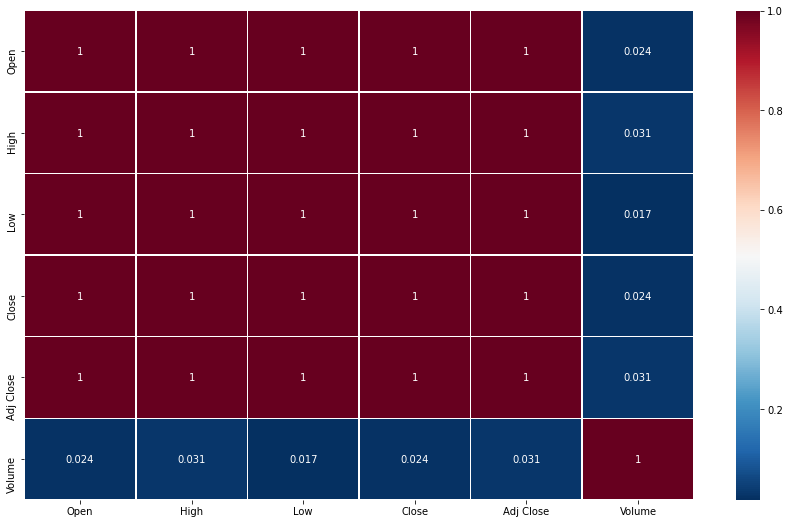

In [ ]:
import seaborn as sb
sb.heatmap(corr_Jfng,xticklabels=corr_Jfng.columns, yticklabels=corr_Jfng.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

# Assesing the visual comparison of dependent varriable againt the independent varriables 

## *MTN*

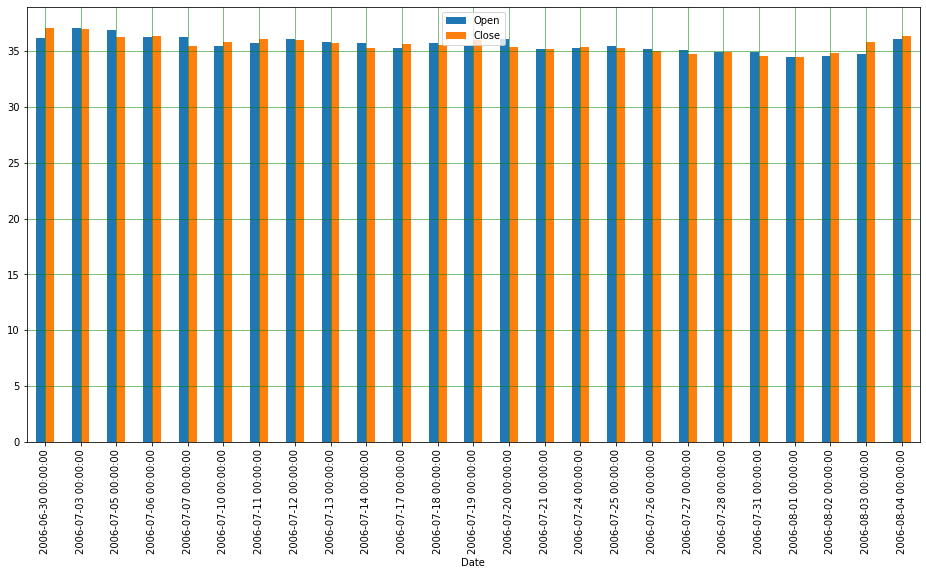

In [ ]:
#Plot Open vs Close
mtn[['Open','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

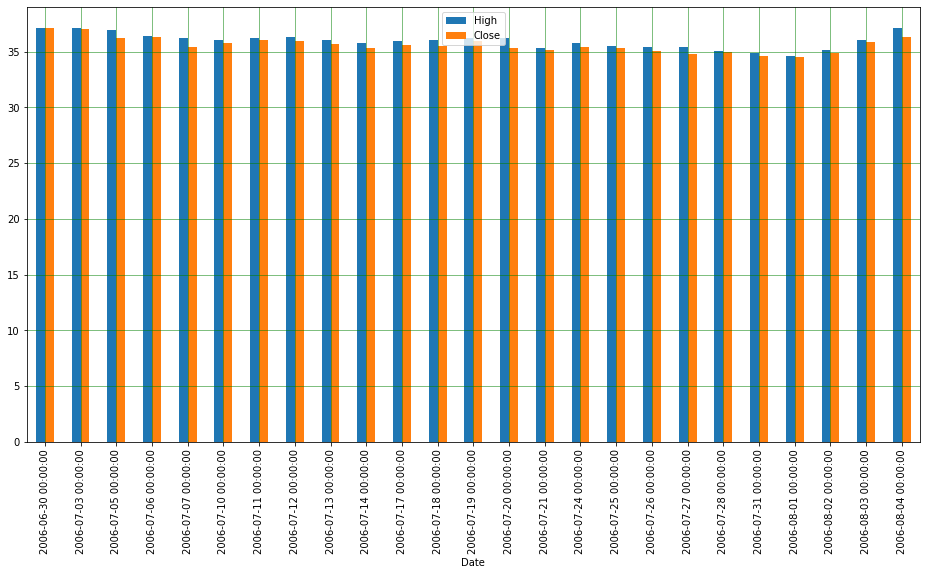

In [ ]:
#Plot High vs Close
mtn[['High','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

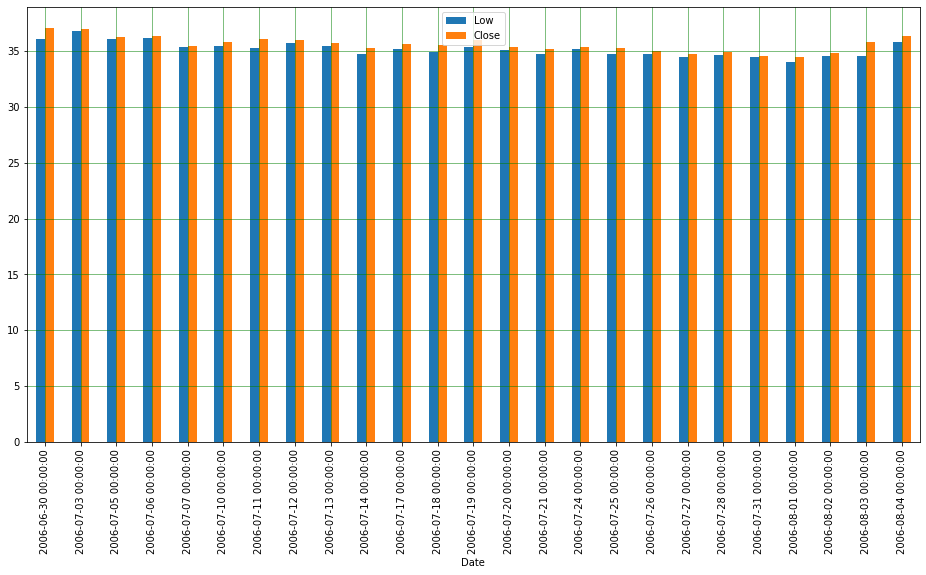

In [ ]:
#Plot Low vs  Close
mtn[['Low','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## *JIFENG*

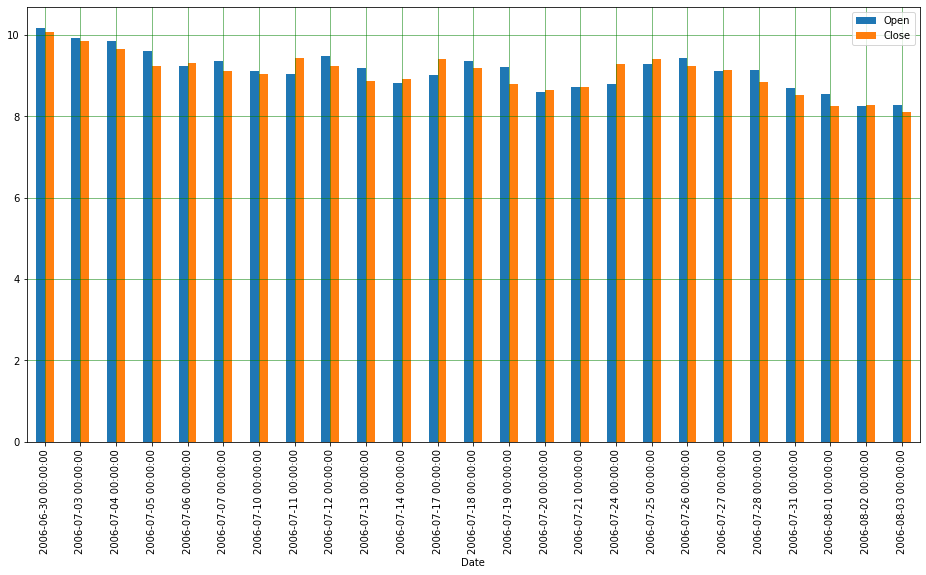

In [ ]:
#Plot Open vs Close
Jifeng[['Open','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

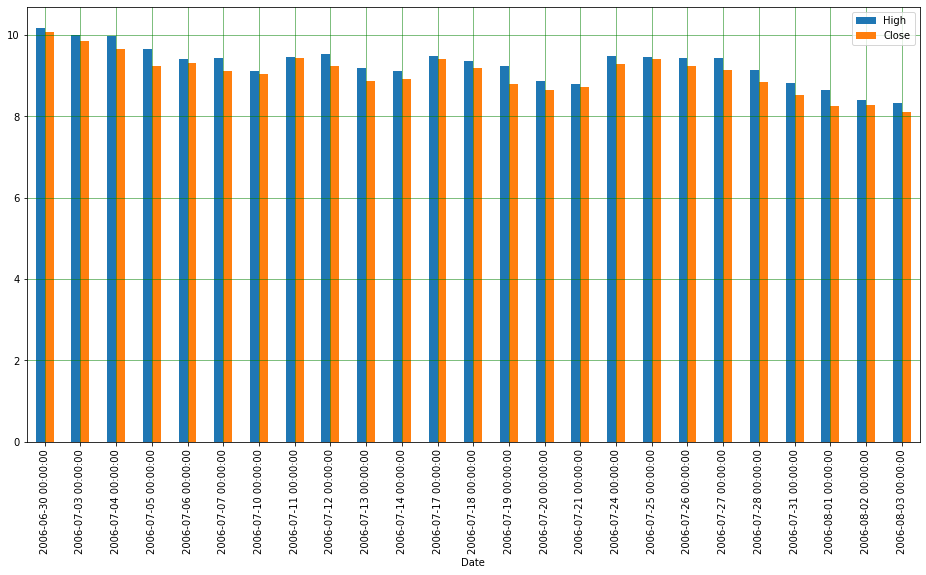

In [ ]:
#Plot High vs Close
Jifeng[['High','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

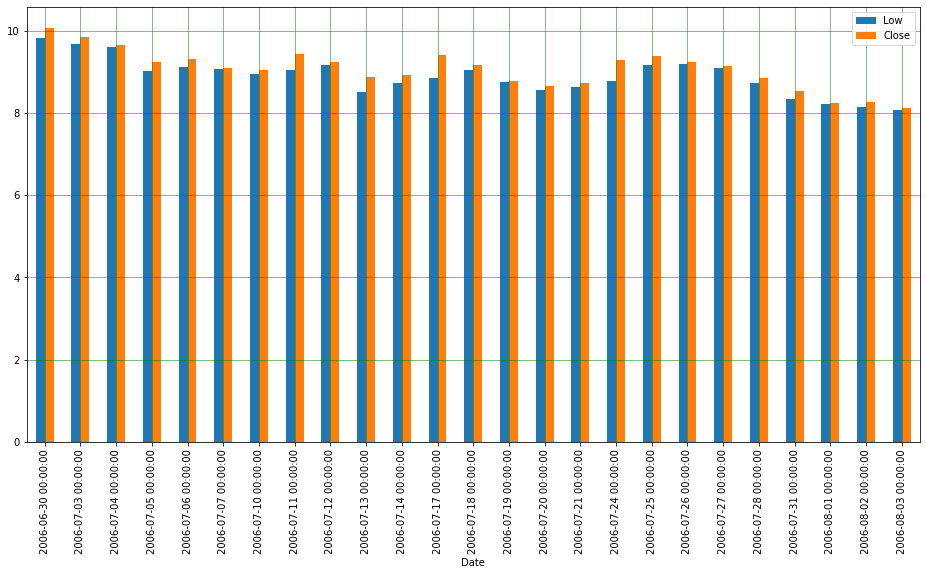

In [ ]:
#Plot Low vs  Close
Jifeng[['Low','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# MODELLING
### THE SVR MODEL

In [ ]:
# setting the date column as indx
mtn['Date'] = mtn.index
Jifeng['Date'] = Jifeng.index 

## *MODELING MTN*

In [ ]:
#preparing the dataset to work with 
mtn=mtn[['Date','High','Open','Low','Close']]
mtn.head(10)

,Date,High,Open,Low,Close
Date,,,,,
2006-06-30,2006-06-30,37.099998,36.200001,36.049999,37.099998
2006-07-03,2006-07-03,37.150002,37.049999,36.770000,37.000000
2006-07-05,2006-07-05,36.970001,36.930000,36.119999,36.259998
2006-07-06,2006-07-06,36.410000,36.290001,36.200001,36.349998
2006-07-07,2006-07-07,36.220001,36.220001,35.369999,35.450001
2006-07-10,2006-07-10,36.000000,35.450001,35.430000,35.799999
2006-07-11,2006-07-11,36.200001,35.700001,35.310001,36.060001
2006-07-12,2006-07-12,36.270000,36.099998,35.730000,35.980000
2006-07-13,2006-07-13,36.060001,35.840000,35.419998,35.680000


In [ ]:
#Model training and testing

#Date format is DateTime and it will throw error while training so I have created seperate month, year and date entities
mtn['Year']=mtn['Date'].dt.year
mtn['Month']=mtn['Date'].dt.month
mtn['Day']=mtn['Date'].dt.day

In [ ]:
# creating the final dataset for modelling
mtn=mtn[['Day','Month','Year','High','Open','Low','Close']]
mtn.head(10)

,Day,Month,Year,High,Open,Low,Close
Date,,,,,,,
2006-06-30,30,6,2006,37.099998,36.200001,36.049999,37.099998
2006-07-03,3,7,2006,37.150002,37.049999,36.770000,37.000000
2006-07-05,5,7,2006,36.970001,36.930000,36.119999,36.259998
2006-07-06,6,7,2006,36.410000,36.290001,36.200001,36.349998
2006-07-07,7,7,2006,36.220001,36.220001,35.369999,35.450001
2006-07-10,10,7,2006,36.000000,35.450001,35.430000,35.799999
2006-07-11,11,7,2006,36.200001,35.700001,35.310001,36.060001
2006-07-12,12,7,2006,36.270000,36.099998,35.730000,35.980000
2006-07-13,13,7,2006,36.060001,35.840000,35.419998,35.680000


the dataset above is the final dataset we av preared for our regression models

In [ ]:
#separate Independent and dependent variable
X = mtn.iloc[:,mtn.columns !='Close']
Y= mtn.iloc[:, 5]

print(X.shape) 
print(Y.shape) 

(3590, 6)
(3590,)


In [ ]:
# tain and test splitting of the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [ ]:
print(x_train.shape)
print(x_test.shape)  
print(y_train.shape)
print(y_test.shape) 

# we now aim to evaluate y_test with y_pred for Differeent Regression models


(2692, 6)
(898, 6)
(2692,)
(898,)


#  The Support Vector Machine Regression Model (SVM)

In [ ]:
# svm Model training and testing
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)

In [ ]:
##################################################################
# cross-validation of knn
knn_kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

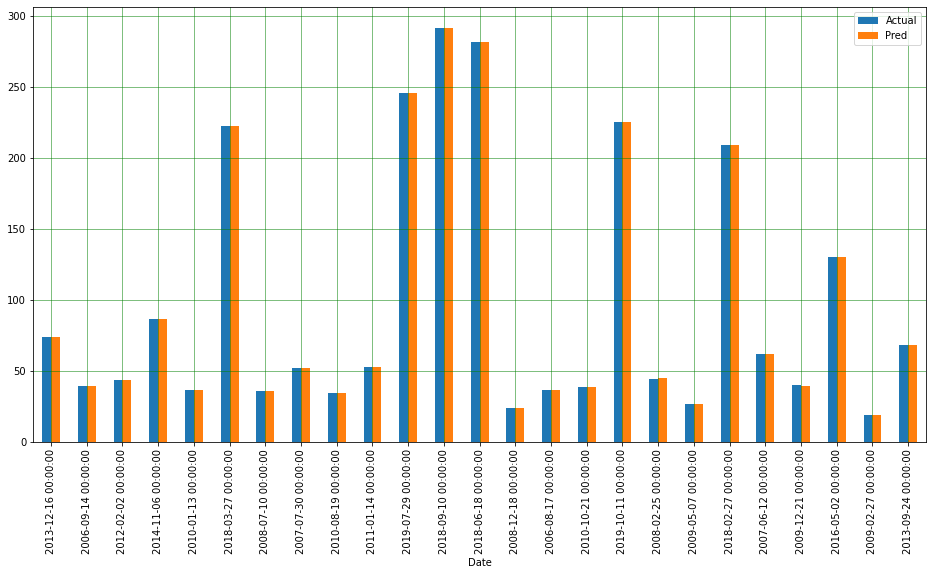

In [ ]:
plot_svm_df=pd.DataFrame({'Actual':y_test,'Pred':y_svm_pred})
plot_svm_df.head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

the SVM predicts our model perfrctly as visualized from the graph above

# TEST STATISTICS FOR MODELLING 

## RMSE (Root Mean Square Error)

The root mean of the square error (RMSE) is the square root of the square mean of the whole error. The use of RMSE is very common, and for numerical forecasts, it is considered an excellent general-purpose error metric. They are a measure of how far data points are from the regression. Or in simple terms how concentrated the data points are around the best fit line.

$RMSE = \sqrt{\frac{1}{n}\Sigma^n_{i=1}(S_i - O_i)^2}$



In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [ ]:

svm_mse=math.sqrt(mean_squared_error(y_test,y_svm_pred))
print('SVM Model Root mean square error SVM',svm_mse)

Linear Model Root mean square error 1.7577599767045707e-14
KNN Model Root mean square error 1.0013305843613831
SVM Model Root mean square error SVM 0.03679421800249008


In [ ]:

print('SVM R2: ', r2_score(y_test, y_svm_pred))

Linear R2:  1.0
KNN R2:  0.9998231837957683
SVM R2:  0.9999997612594144






MODELING JIFENG


In [ ]:
#preparing the dataset to work with 
Jifeng=Jifeng[['Date','High','Open','Low','Close']]
Jifeng.head(10)

,Date,High,Open,Low,Close
Date,,,,,
2006-06-30,2006-06-30,10.17950,10.17950,9.81410,10.07690
2006-07-03,2006-07-03,10.00000,9.92949,9.67949,9.85256
2006-07-04,2006-07-04,9.96154,9.83974,9.61538,9.65385
2006-07-05,2006-07-05,9.64744,9.61538,9.01923,9.23077
2006-07-06,2006-07-06,9.40385,9.22436,9.11538,9.32051
2006-07-07,2006-07-07,9.44231,9.35897,9.07051,9.10256
2006-07-10,2006-07-10,9.10256,9.10256,8.94231,9.04487
2006-07-11,2006-07-11,9.44872,9.05128,9.05128,9.43590
2006-07-12,2006-07-12,9.51923,9.49359,9.17949,9.23077


In [ ]:
#Model training and testing

#Date format is DateTime and it will throw error while training so I have created seperate month, year and date entities
Jifeng['Year']=Jifeng['Date'].dt.year
Jifeng['Month']=Jifeng['Date'].dt.month
Jifeng['Day']=Jifeng['Date'].dt.day

In [ ]:
# creating the final Jifeng dataset for modelling
Jifeng=Jifeng[['Day','Month','Year','High','Open','Low','Close']]
Jifeng.head(10)

,Day,Month,Year,High,Open,Low,Close
Date,,,,,,,
2006-06-30,30,6,2006,10.17950,10.17950,9.81410,10.07690
2006-07-03,3,7,2006,10.00000,9.92949,9.67949,9.85256
2006-07-04,4,7,2006,9.96154,9.83974,9.61538,9.65385
2006-07-05,5,7,2006,9.64744,9.61538,9.01923,9.23077
2006-07-06,6,7,2006,9.40385,9.22436,9.11538,9.32051
2006-07-07,7,7,2006,9.44231,9.35897,9.07051,9.10256
2006-07-10,10,7,2006,9.10256,9.10256,8.94231,9.04487
2006-07-11,11,7,2006,9.44872,9.05128,9.05128,9.43590
2006-07-12,12,7,2006,9.51923,9.49359,9.17949,9.23077


In [ ]:
#separate Independent and dependent variable
X = Jifeng.iloc[:,mtn.columns !='Close']
Y= Jifeng.iloc[:, 5]

print(X.shape) 
print(Y.shape) 

(3473, 6)
(3473,)


In [ ]:
# tain and test splitting of the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

print(x_train.shape)
print(x_test.shape)  
print(y_train.shape)
print(y_test.shape) 

# we now aim to evaluate y_test with y_pred for Differeent Regression models

(2604, 6)
(869, 6)
(2604,)
(869,)


## The Support Vector Machine Regression Model (SVM) for JIFENG

In [ ]:
# svm Model training and testing
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)

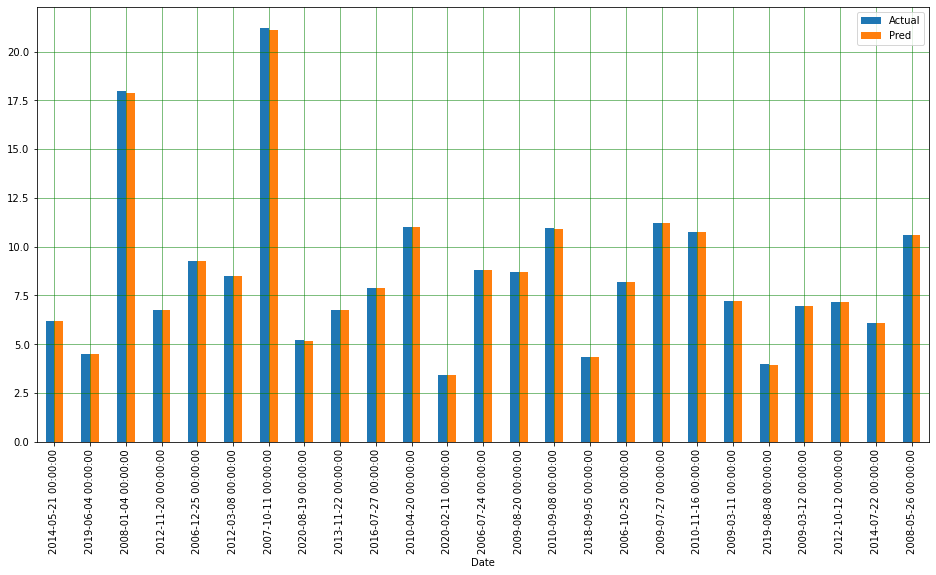

In [ ]:
plot_svm_df=pd.DataFrame({'Actual':y_test,'Pred':y_svm_pred})
plot_svm_df.head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# TEST STATISTICS FOR JIFENG ML-REGRESSION MODELS

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [ ]:


svm_mse=math.sqrt(mean_squared_error(y_test,y_svm_pred))
print('SVM Model Root mean square error SVM',svm_mse)

Linear Model Root mean square error 6.661951361242779e-15
KNN Model Root mean square error 0.28040410367745694
SVM Model Root mean square error SVM 0.02689172496468494


In [ ]:

print('SVM R2: ', r2_score(y_test, y_svm_pred))

Linear R2:  1.0
KNN R2:  0.9936981874424791
SVM R2:  0.9999420392398427


# TIME SERIES MODELLING

In [ ]:
# importing necessary libaries for modelling 
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

from scipy.stats import shapiro
from scipy.stats import probplot
from statsmodels.stats.diagnostic import het_arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

import matplotlib.pyplot as plt
import matplotlib as mpl

import yfinance as yf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#preparing mtn dataset for Garch modelling
mtn = yf.download('MTN',
                  start = '2006-06-30',
                  end='2020-10-3',
                  progress = False)
mtn['Date'] = mtn.index
mtn = mtn.dropdf = mtn.drop(columns=['Open', 'High', 'Low', 'Volume', 'Date', 'Adj Close'])
mtn['pct_change'] = 100*mtn['Close'].pct_change()
mtn.dropna(inplace=True)
mtn.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


,Close,pct_change
Date,,
2006-07-03,37.000000,-0.269538
2006-07-05,36.259998,-2.000005
2006-07-06,36.349998,0.248208
2006-07-07,35.450001,-2.475922
2006-07-10,35.799999,0.987302


In [ ]:
#preparing jifeng dataset for Garch modelling
Jifeng = yf.download('600616.SS',
                  start = '2006-06-30',
                  end='2020-10-3',
                  progress = False)
Jifeng['Date'] = Jifeng.index
Jifeng = Jifeng.dropdf = Jifeng.drop(columns=['Open', 'High', 'Low', 'Volume','Date', 'Adj Close'])
Jifeng['pct_change'] = 100*Jifeng['Close'].pct_change()
Jifeng.dropna(inplace=True)
Jifeng.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


,Close,pct_change
Date,,
2006-07-03,9.85256,-2.226275
2006-07-04,9.65385,-2.016841
2006-07-05,9.23077,-4.382495
2006-07-06,9.32051,0.972181
2006-07-07,9.10256,-2.338390


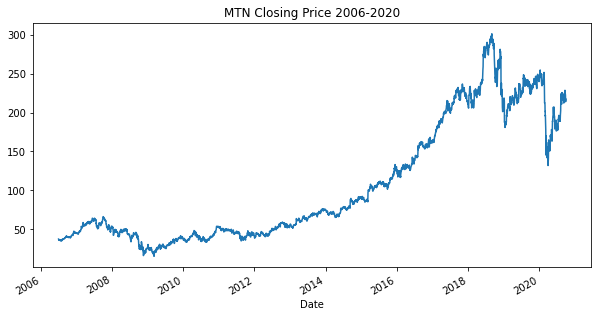

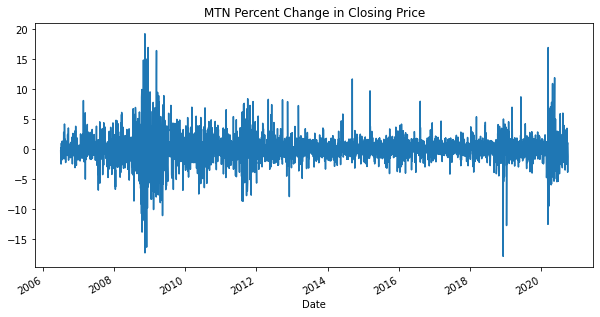

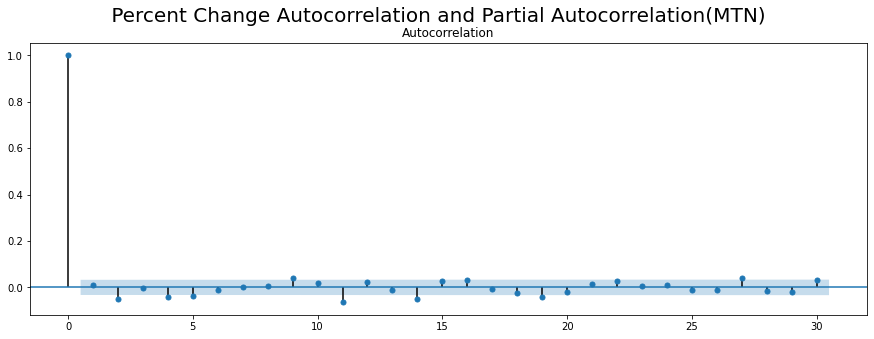

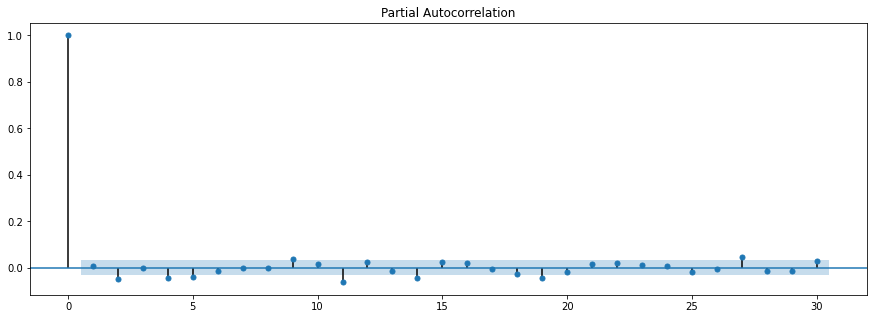

In [ ]:
mtn['Close'].plot(figsize=(10, 5), title='MTN Closing Price 2006-2020')
plt.show()

mtn['pct_change'].plot(figsize=(10, 5), title='MTN Percent Change in Closing Price')
plt.show()

acf = smt.graphics.plot_acf(mtn['pct_change'], lags=30)
pacf = smt.graphics.plot_pacf(mtn['pct_change'], lags=30)
acf.suptitle(f' Percent Change Autocorrelation and Partial Autocorrelation(MTN)', fontsize=20)
acf.set_figheight(5)
acf.set_figwidth(15)
pacf.set_figheight(5)
pacf.set_figwidth(15)
plt.show()



In [ ]:
ljung_res = acorr_ljungbox(mtn['pct_change'], lags= 40, boxpierce=True)
print(f'Ljung-Box p-values: {ljung_res[1]}')
print(f'\nBox-Pierce p-values: {ljung_res[3]}')

Ljung-Box p-values: [5.58279538e-01 1.21191635e-02 3.15550352e-02 5.65952624e-03
 1.18953628e-03 2.17219879e-03 4.38504020e-03 8.06308165e-03
 1.99320198e-03 2.18366494e-03 1.24574410e-05 1.29244381e-05
 2.17875761e-05 1.32631292e-06 8.81656993e-07 5.06484838e-07
 9.85496980e-07 8.94771266e-07 1.66482479e-07 1.77911663e-07
 2.41095945e-07 1.67247436e-07 2.92071870e-07 4.55652436e-07
 7.28189323e-07 1.07653771e-06 1.97762112e-07 2.71899345e-07
 2.72246812e-07 1.29019917e-07 1.83690468e-07 1.76699080e-07
 2.47692166e-07 5.74030201e-08 6.16624778e-08 1.05645161e-07
 1.27053414e-07 9.88952458e-08 1.23544609e-07 2.01386046e-07]

Box-Pierce p-values: [5.58443965e-01 1.21783018e-02 3.16947617e-02 5.70786582e-03
 1.20513766e-03 2.20030578e-03 4.43891829e-03 8.15732667e-03
 2.02954246e-03 2.22620463e-03 1.30052129e-05 1.35194030e-05
 2.27832121e-05 1.41061668e-06 9.42257011e-07 5.44540574e-07
 1.05819013e-06 9.64183419e-07 1.82037058e-07 1.95068157e-07
 2.64612717e-07 1.84717416e-07 3.22221395e

In [ ]:
def ts_plot(residuals, stan_residuals, lags=50):
    residuals.plot(title='GARCH Residuals(MTN)', figsize=(15, 10))
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].set_title('GARCH Standardized Residuals KDE(MTN)')
    ax[1].set_title('GARCH Standardized Resduals Probability Plot (MTN)')    
    residuals.plot(kind='kde', ax=ax[0])
    probplot(stan_residuals, dist='norm', plot=ax[1])
    plt.show()
    acf = smt.graphics.plot_acf(stan_residuals, lags=lags)
    pacf = smt.graphics.plot_pacf(stan_residuals, lags=lags)
    acf.suptitle('GARCH Model Standardized Residual Autocorrelation (MTN)', fontsize=20)
    acf.set_figheight(5)
    acf.set_figwidth(15)
    pacf.set_figheight(5)
    pacf.set_figwidth(15)
    plt.show()

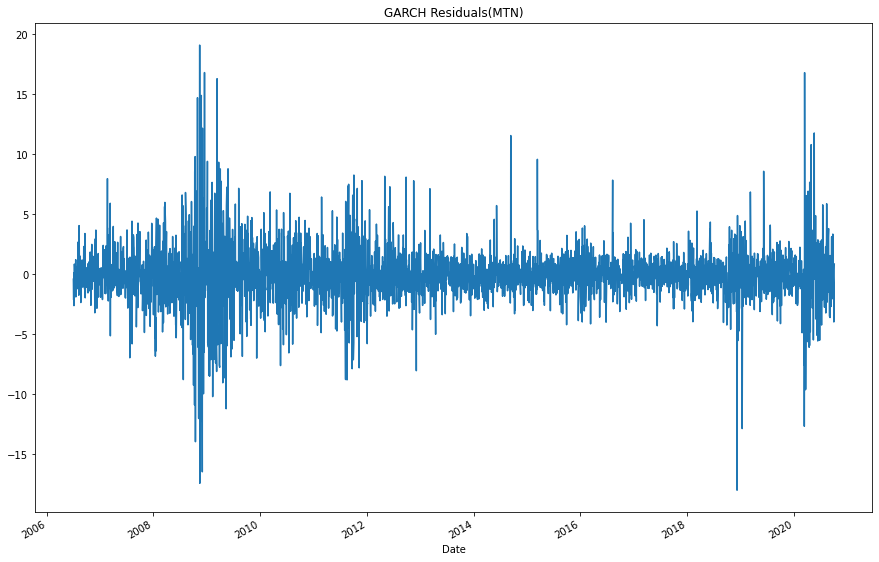

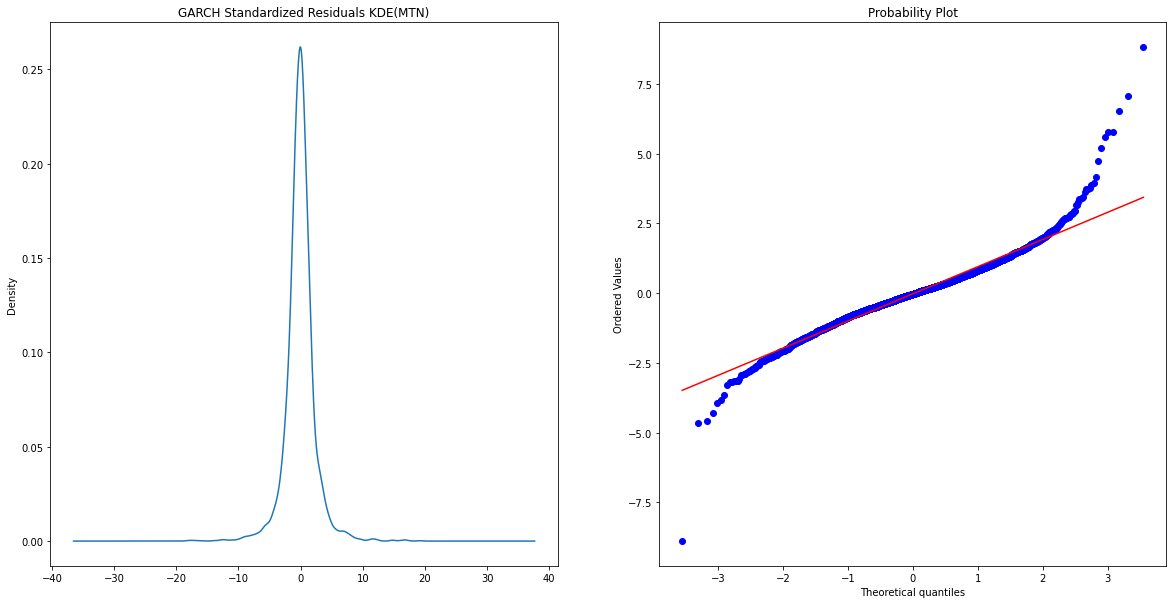

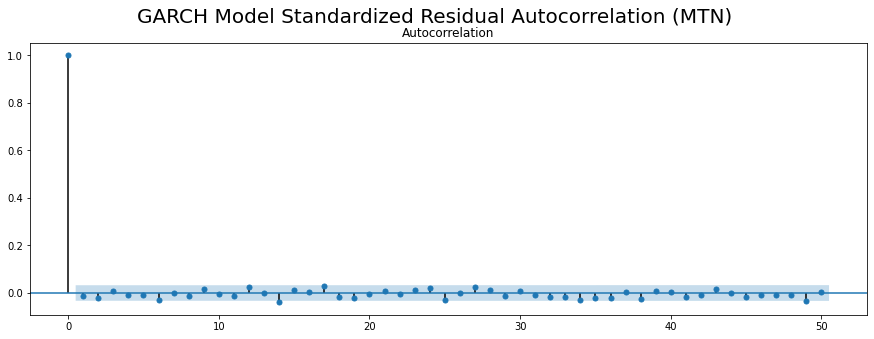

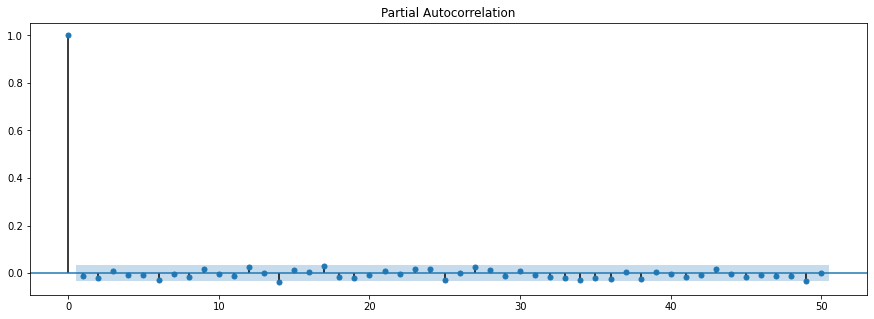

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             pct_change   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -7468.37
Distribution:                  Normal   AIC:                           14944.7
Method:            Maximum Likelihood   BIC:                           14969.5
                                        No. Observations:                 3589
Date:                Sat, Oct 24 2020   Df Residuals:                     3585
Time:                        05:41:17   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1297  3.026e-02      4.285  1.829e-05 [7.035e-02,  0.189]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0787  3.243e-02      2.428  1.519e-02   [1.517e-02,  0.142]
alpha[1]       0.0668  1.622e-02      4.120  3.781e-05 [3.504e-02,9.863e-02]
beta[1]        0.9164  2.060e-02     44.491      0.000     [  0.876,  0.957]
============================================================================

Covariance estimator: robust
"""

In [ ]:
garch = arch_model(mtn['pct_change'], vol='GARCH', p=1, q=1, dist='normal')
fgarch = garch.fit(disp='off') 
resid = fgarch.resid
st_resid = np.divide(resid, fgarch.conditional_volatility)
ts_plot(resid, st_resid)
fgarch.summary()

Here are the results of our MTN GARCH(1,1) model:
Omega is the baseline variance for the formula, so the square root of omega is the standard deviation of returns, 3 percent. For our average of roughly 0.1, we would hope to  have return of 0.1 with a standard deviation of 3 percent, which is very low in terms of unpredictability. 

Next, our coefficients alpha and beta. Alpha tests how much a shock of volatility feeds into volatility in the coming period. In our model, volatility will be moved to the next day for 9% of previous periods. Beta is our persistence parameter, if beta reaches 1, it contributes to a positive feedback loop that can deliver flat variance in small shocks. The sum of alpha and beta is the rate at which our variance decreases and if alpha plus beta is equal to 1, then our model is constantly volatile and we will want to analyze other models, such as IGARCH (Integrated Garch).


The text notes that the normal range of alpha in a stable market is $0.05 < \alpha<0.1$ and beta $0.85 < \beta < 0.98$. The market risk estimation is typically a stable market. These are not entirely applicable to a single stock estimate, however, it does give us some insight into what kind of values we might see.

Next, we have our t-statistics and p-values. T is our estimate divided by the standard error and is used to calculate our p-value. The normal null hypothesis is that we have no effect, but will refuse zero if our p value is less than an alpha (0.05). It is helpful to pay attention to the p-values as we start to get models with more parameters.

Over there we have carried out some exercise test, which we will add below. We should deny the null so that we begin to look for better model parameters all the tests suggest. We can see that at least 25th lag is obviously self-correlated and that uniform remnants are not like white sound. In order to find a model ideally suited for variance, we can use a grid search for a wide range of p and q.

In [ ]:
arch_test = het_arch(resid, maxlag=50)
shapiro_test = shapiro(st_resid)

print(f'Lagrange mulitplier p-value: {arch_test[1]}')
print(f'F test p-value: {arch_test[3]}')
print(f'Shapiro-Wilks p-value: {shapiro_test[1]}')

Lagrange mulitplier p-value: 7.251452093353409e-171
F test p-value: 5.227704787659386e-203
Shapiro-Wilks p-value: 4.548744367819772e-33


The Jarque Bera test statistic for MTN and JIFENG Close Price reads 508.77416464325773 and 2141.5634330749203 with both p value less than 0.05 (i.e. 0). we thus reject the null hypothesis that both our dataset are not normally distributed. in other words we conclude that thedeparture from normality as measures by the test statistics is statistically significant.

*JIFENG*

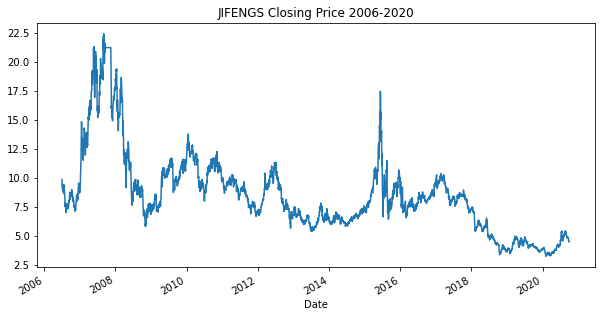

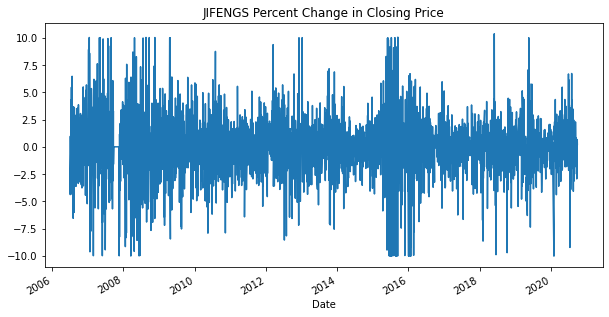

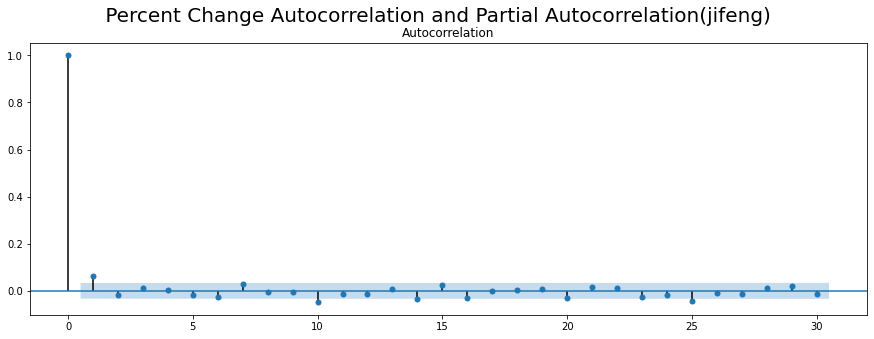

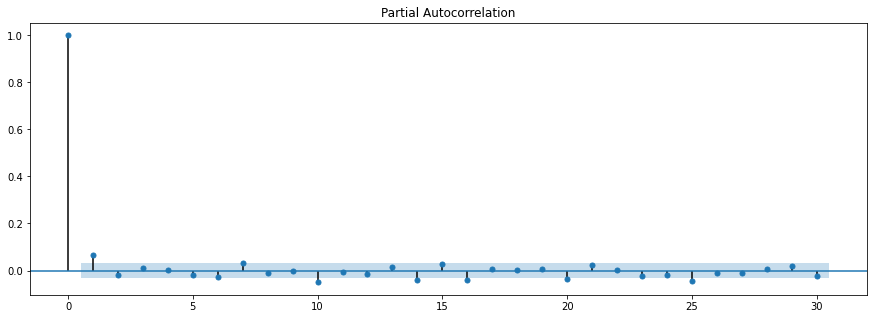

In [ ]:
Jifeng['Close'].plot(figsize=(10, 5), title='JIFENGS Closing Price 2006-2020')
plt.show()

Jifeng['pct_change'].plot(figsize=(10, 5), title='JIFENGS Percent Change in Closing Price')
plt.show()

acf = smt.graphics.plot_acf(Jifeng['pct_change'], lags=30)
pacf = smt.graphics.plot_pacf(Jifeng['pct_change'], lags=30)
acf.suptitle(f' Percent Change Autocorrelation and Partial Autocorrelation(jifeng)', fontsize=20)
acf.set_figheight(5)
acf.set_figwidth(15)
pacf.set_figheight(5)
pacf.set_figwidth(15)
plt.show()

In [ ]:
ljung_res = acorr_ljungbox(Jifeng['pct_change'], lags= 40, boxpierce=True)
print(f'Ljung-Box p-values: {ljung_res[1]}')
print(f'\nBox-Pierce p-values: {ljung_res[3]}')

Ljung-Box p-values: [1.51254761e-04 4.94432563e-04 1.36866921e-03 3.54580886e-03
 4.67153063e-03 3.22467882e-03 1.83329113e-03 3.51546497e-03
 6.37677383e-03 5.07764560e-04 7.69544900e-04 1.10269527e-03
 1.75199517e-03 5.91608118e-04 5.46746515e-04 3.17113640e-04
 5.38237510e-04 8.73622665e-04 1.32288413e-03 7.89774203e-04
 9.62928639e-04 1.21703286e-03 9.63396385e-04 1.15122310e-03
 2.13393738e-04 3.13880935e-04 3.96779068e-04 5.38047611e-04
 5.71123375e-04 7.44081318e-04 1.14114361e-04 1.85527047e-05
 2.68726348e-05 4.14329597e-05 1.79248792e-05 1.46644471e-05
 2.25661122e-05 3.09851964e-05 3.28050275e-05 1.70107671e-05]

Box-Pierce p-values: [1.52254041e-04 4.97755573e-04 1.37769280e-03 3.56788626e-03
 4.70423490e-03 3.25486825e-03 1.85624450e-03 3.55761533e-03
 6.44964814e-03 5.19642485e-04 7.87611803e-04 1.12884291e-03
 1.79281196e-03 6.10245770e-04 5.65454928e-04 3.29826347e-04
 5.59159394e-04 9.06619920e-04 1.37184183e-03 8.24300729e-04
 1.00587550e-03 1.27191899e-03 1.01156526e

In [ ]:
def ts_plot(residuals, stan_residuals, lags=50):
    residuals.plot(title='GARCH Residuals(JIFENG)', figsize=(15, 10))
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].set_title('GARCH Standardized Residuals KDE (JIFENG)')
    ax[1].set_title('GARCH Standardized Resduals Probability Plot(JIFENG)')    
    residuals.plot(kind='kde', ax=ax[0])
    probplot(stan_residuals, dist='norm', plot=ax[1])
    plt.show()
    acf = smt.graphics.plot_acf(stan_residuals, lags=lags)
    pacf = smt.graphics.plot_pacf(stan_residuals, lags=lags)
    acf.suptitle('GARCH Model Standardized Residual Autocorrelation(JIFENG)', fontsize=20)
    acf.set_figheight(5)
    acf.set_figwidth(15)
    pacf.set_figheight(5)
    pacf.set_figwidth(15)
    plt.show()

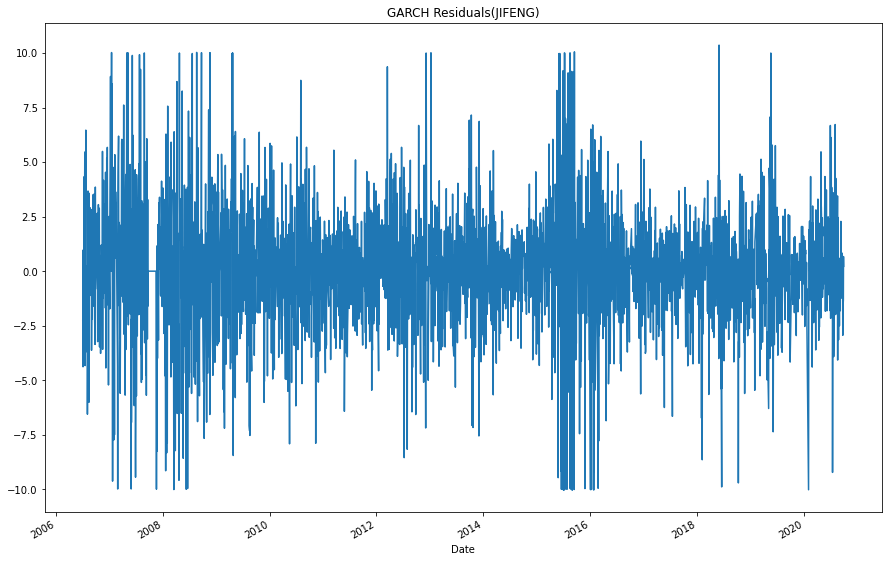

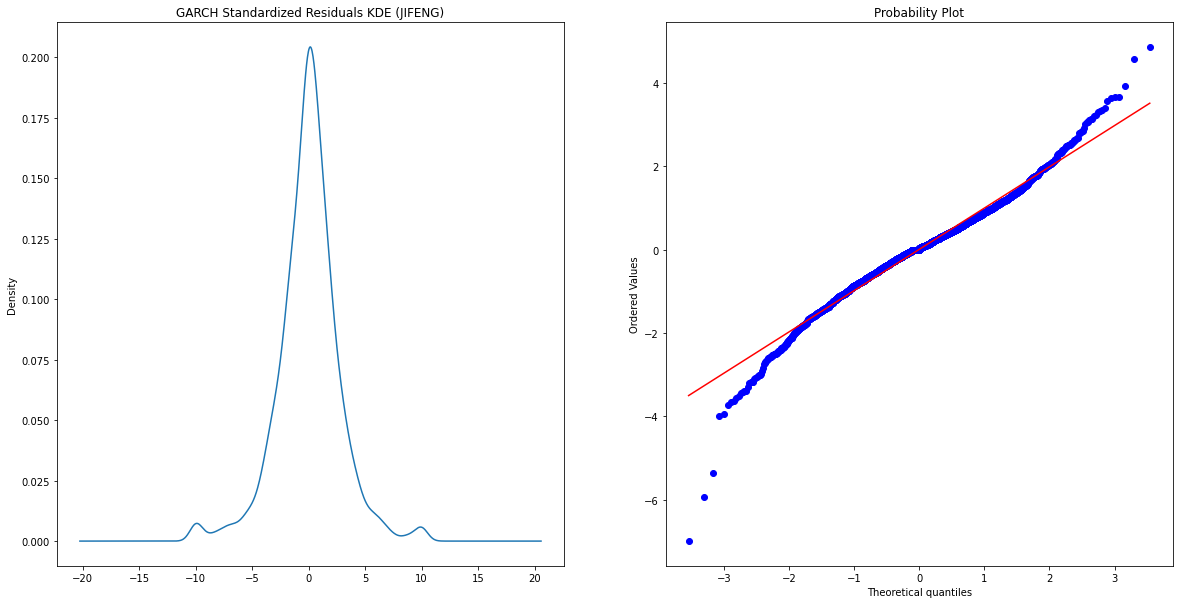

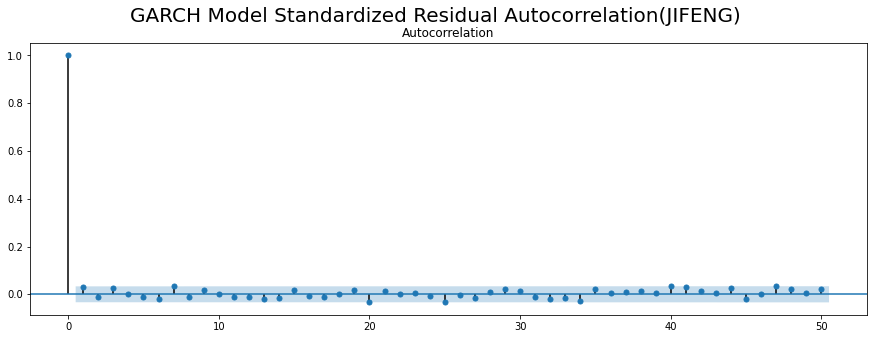

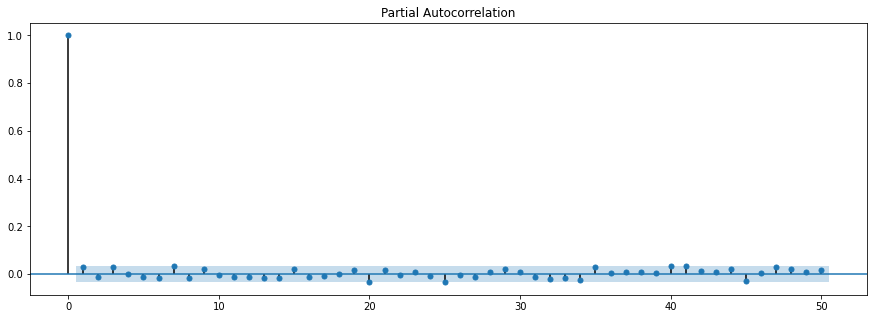

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             pct_change   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -8080.76
Distribution:                  Normal   AIC:                           16169.5
Method:            Maximum Likelihood   BIC:                           16194.1
                                        No. Observations:                 3472
Date:                Sat, Oct 24 2020   Df Residuals:                     3468
Time:                        05:00:21   Df Model:                            4
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.8171e-03  3.804e-02 -4.777e-02      0.962 [-7.636e-02,7.273e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1107  7.607e-02      1.455      0.146 [-3.843e-02,  0.260]
alpha[1]       0.0610  2.458e-02      2.480  1.313e-02  [1.279e-02,  0.109]
beta[1]        0.9234  3.390e-02     27.238 2.292e-163    [  0.857,  0.990]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
garch = arch_model(Jifeng['pct_change'], vol='GARCH', p=1, q=1, dist='normal')
fgarch = garch.fit(disp='off') 
resid = fgarch.resid
st_resid = np.divide(resid, fgarch.conditional_volatility)
ts_plot(resid, st_resid)
fgarch.summary()

In [ ]:
arch_test = het_arch(resid, maxlag=50)
shapiro_test = shapiro(st_resid)

print(f'Lagrange mulitplier p-value: {arch_test[1]}')
print(f'F test p-value: {arch_test[3]}')
print(f'Shapiro-Wilks p-value: {shapiro_test[1]}')

Lagrange mulitplier p-value: 6.842378966446563e-114
F test p-value: 4.165390227629976e-129
Shapiro-Wilks p-value: 1.487159442562948e-22
